<a href="https://colab.research.google.com/github/fdevil420/test/blob/main/SVMtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
# Load the dataset
train_data =pd.read_csv('train.csv', engine='python', encoding='utf-8', error_bad_lines=False)
test_data =pd.read_csv('test.csv', engine='python', encoding='utf-8', error_bad_lines=False)

<ipython-input-43-7b7de881025c>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  train_data =pd.read_csv('train.csv', engine='python', encoding='utf-8', error_bad_lines=False)
<ipython-input-43-7b7de881025c>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  test_data =pd.read_csv('test.csv', engine='python', encoding='utf-8', error_bad_lines=False)


In [44]:
train_data.head()

,title,author,text,label,Unnamed: 4,Unnamed: 5
0,House Dem Aide: We Didnâ€™t Even See Comeyâ€™s...,Darrell Lucus,House Dem Aide: We Didnâ€™t Even See Comeyâ€™s...,1,NaN,NaN
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,NaN,NaN
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,NaN,NaN
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,NaN,NaN
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,NaN,NaN


In [45]:
train_data.shape

(2501, 6)

In [46]:
train_data.isnull().sum()

title           65
author         253
text             7
label            0
Unnamed: 4    2491
Unnamed: 5    2500
dtype: int64

In [47]:
train_data = train_data.fillna('')

In [48]:
def clean_text(text):
    if isinstance(text, str):
        # Convert text to lowercase
        text = text.lower()
        # Remove special characters and punctuation
        text = re.sub(r'[^\w\s]', '', text)
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = text.split()
        words = [word for word in words if word not in stop_words]
        # Join the cleaned words back into a string
        cleaned_text = ' '.join(words)
        return cleaned_text
    else:
        return ''


In [49]:
train_data['cleaned_text'] = train_data['text'].apply(clean_text)
test_data['cleaned_text'] = test_data['text'].apply(clean_text)

In [50]:
X_train = train_data['cleaned_text']
y_train = train_data['label']
X_test = test_data['cleaned_text']
y_test = test_data['label']


In [51]:
# Create a TfidfVectorizer object to transform text into numerical features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

In [52]:
# Fit and transform the training data
X_train_vec = vectorizer.fit_transform((X_train).values.astype('U'))

In [53]:
# Transform the testing data
X_test_vec = vectorizer.transform((X_test).values.astype('U'))

In [54]:
# Create an SVM classifier object
svm = SVC(kernel='linear')

In [55]:
# Fit the model on the training data
svm.fit(X_train_vec, y_train)

SVC(kernel='linear')

In [56]:
# Predict the labels of the testing data
y_pred = svm.predict(X_test_vec)

In [57]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='micro')

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9144
Precision: 0.9098727944796283
Recall: 0.9144
F1-score: 0.9144


In [59]:
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


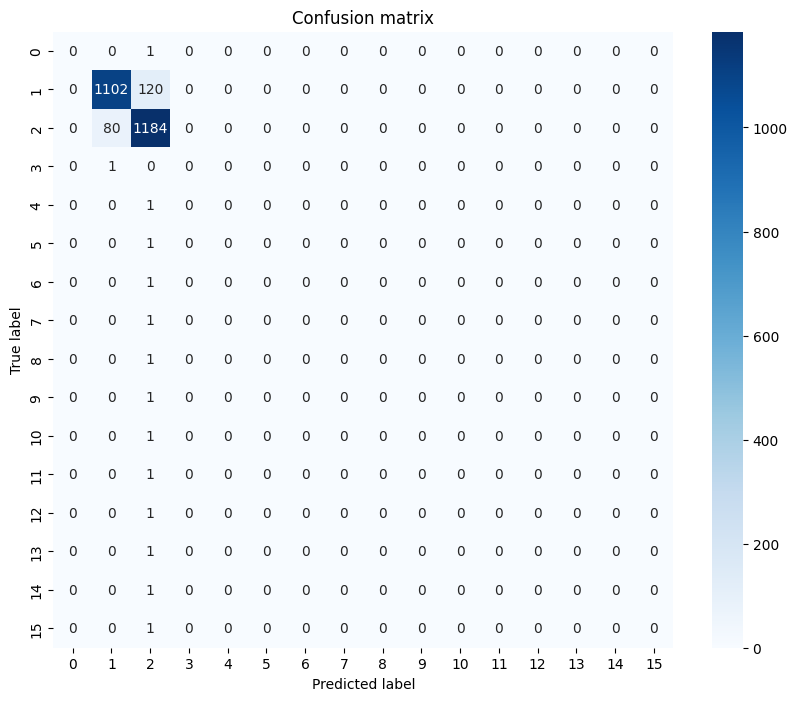

In [60]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [61]:
print('Classification report:\n', cr)

Classification report:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 